## Neural Network with Noise Filtering and Preprocessing

In [1]:
import os
import numpy as np
from PIL import Image
import cv2
from skimage import color,transform

In [2]:
dataset = []
labels = []

In [331]:
from PIL import Image,ImageFilter
from scipy.misc import toimage
from operator import itemgetter
from skimage import measure
import numpy as np
import heapq
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
from skimage.filters import *  



#----------------------------------------------------------------

class preprocessing:
    def pre_proc_image(self,img):
        img_removed_noise=self.apply_median_filter(img)
        img_removed_noise=self.remove_noise(img)
        p1,p2,LL=self.get_line_position(img_removed_noise)
        img=self.remove_line(p1,p2,LL,img_removed_noise)
        img=median_filter(np.asarray(img),1)
        return img

    def remove_noise(self,img):
        img_gray=img.convert('L')
        w,h=img_gray.size
        max_color=np.asarray(img_gray).max()
        pix_access_img=img_gray.load()
        row_img=list(map(lambda x:255 if x in range(max_color-15,max_color+1) else 0,np.asarray(img_gray.getdata())))
        img=np.reshape(row_img,[h,w])
        return img

    def apply_median_filter(self,img):
        img_gray=img.convert('L')
        img_gray=cv2.medianBlur(np.asarray(img_gray),3)
        img_bw=(img_gray>np.mean(img_gray))*255
        return img_bw

    def eliminate_zeros(self,vector):
        return [(dex,v) for (dex,v) in enumerate(vector) if v!=0 ]

    def get_line_position(self,img):
        sumx=img.sum(axis=0)
        list_without_zeros=self.eliminate_zeros(sumx)
        min1,min2=heapq.nsmallest(2,list_without_zeros,key=itemgetter(1))
        l=[dex for [dex,val] in enumerate(sumx) if val==min1[1] or val==min2[1]]
        mindex=[l[0],l[len(l)-1]]
        cols=img[:,mindex[:]]
        col1=cols[:,0]
        col2=cols[:,1]
        col1_without_0=self.eliminate_zeros(col1)
        col2_without_0=self.eliminate_zeros(col2)
        line_length=len(col1_without_0)
        dex1=col1_without_0[round(len(col1_without_0)/2)][0]
        dex2=col2_without_0[round(len(col2_without_0)/2)][0]
        p1=[dex1,mindex[0]]
        p2=[dex2,mindex[1]]
        return p1,p2,line_length

    def remove_line(self,p1,p2,LL,img):
#         m=(p2[0]-p1[0])/(p2[1]-p1[1]) if p2[1]!=p1[1] else np.inf
#         h,w=len(img),len(img[0])
#         x=list(range(h))
#         y=list(map(lambda z : int(np.round(p1[0]+m*(z-p1[1]))),x))
#         img_removed_line=list(img)
#         for dex in range(h):
#             i,j=y[dex],x[dex]
#             i=int(i)
#             j=int(j)
#             rlist=[]
#             while i>=0 and i<(len(img_removed_line)-1):
#                 f1=i
#                 if img_removed_line[i][j]==0 and img_removed_line[i-1][j]==0:
#                     break
#                 rlist.append(i)
#                 i=i-1
#             i,j=y[dex],x[dex]
#             i=int(i)
#             j=int(j)
#             while i>=0 and i<(len(img_removed_line)-1):
#                 f2=i
#                 if img_removed_line[i][j]==0 and img_removed_line[i+1][j]==0:
#                     break
#                 rlist.append(i)
#                 i=i+1
#             if np.abs(f2-f1) in [LL+1,LL,LL-1]:
#                 rlist=list(set(rlist))
#                 for k in rlist:
#                     img_removed_line[k][j]=0
        
        block_size = 3
        
        imgUmat = np.float32(img)
        #ret, img_removed_line = cv2.threshold(imgUmat, 12, 255, cv2.THRESH_BINARY,3,3)
        
        #img_removed_line = threshold_local(img, block_size)
        
        img_removed_line=threshold_local(imgUmat, block_size, method='gaussian', offset=0, mode='reflect', param=0.2, cval=0)

        
        

        return img_removed_line

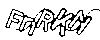

In [336]:
import cv2
from PIL import Image
image = cv2.imread("test.png")

kernel = np.ones((2,2),np.uint8)
imgage = cv2.erode(image,kernel,iterations = 1)
image = cv2.dilate(image,kernel,iterations = 1)

img = Image.fromarray(image)
p = preprocessing()
imgNew = p.pre_proc_image(img)

Image.fromarray(np.array(imgNew, dtype=np.uint8))



In [20]:
import cv2
from PIL import Image

for filename in os.walk("./dataset/"):
    for flname in filename[-1]:
        
        img_path = "./dataset/"+ flname
        
        image = cv2.imread(img_path)
        
        img = Image.fromarray(image)
        
        p = preprocessing()
        
        im = p.pre_proc_image(img)
        
        
        dataset.append(np.asarray(im, dtype=np.float32))
        
        labels.append(flname.replace(".png", ""))





[array([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]], dtype=float32),
 array([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]], dtype=float32),
 array([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]], dtype=fl

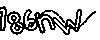

In [21]:
Image.fromarray(np.array(dataset[1], dtype=np.uint8))

In [22]:
labels[1]

'186hw'

In [23]:
ch2index = {}
index2ch = {}
index = 0
for label in labels:
    for ch in label:
        if ch not in ch2index.keys():
            ch2index[ch] = index
            index2ch[index] = ch
            index += 1

In [24]:
ch2index

{'0': 0,
 'p': 1,
 'd': 2,
 '3': 3,
 'w': 4,
 '1': 5,
 '8': 6,
 '6': 7,
 'h': 8,
 '2': 9,
 'v': 10,
 'e': 11,
 'x': 12,
 'f': 13,
 'b': 14,
 'n': 15,
 'z': 16,
 'q': 17,
 'u': 18,
 'y': 19,
 'a': 20,
 's': 21,
 '4': 22,
 'c': 23,
 'k': 24,
 '5': 25,
 '7': 26,
 'm': 27,
 'r': 28,
 'g': 29,
 'o': 30,
 'l': 31,
 'j': 32,
 't': 33,
 '9': 34,
 'i': 35}

In [25]:
print("total char type:", len(ch2index))

total char type: 36


In [26]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []

for label in labels:
    y0.append(ch2index[label[0]])
    y1.append(ch2index[label[1]])
    y2.append(ch2index[label[2]])
    y3.append(ch2index[label[3]])
    y4.append(ch2index[label[4]])

In [27]:
len(y0)

11303

In [28]:
X_train = np.array(dataset[:10000]).reshape(-1, 40, 100, 1)
y_train = [
    np.array(y0[:10000]),
    np.array(y1[:10000]),
    np.array(y2[:10000]),
    np.array(y3[:10000]),
    np.array(y4[:10000]),
]

In [29]:
X_train.shape

(10000, 40, 100, 1)

In [30]:
X_test = np.array(dataset[10000:]).reshape(-1, 40, 100, 1)
y_test = [
    np.array(y0[10000:]),
    np.array(y1[10000:]),
    np.array(y2[10000:]),
    np.array(y3[10000:]),
    np.array(y4[10000:]),
]

In [31]:
X_test.shape

(1303, 40, 100, 1)

## Train the Network

In [32]:
from keras.layers import Activation, Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Model
from keras.layers.merge import Concatenate


def build_model():
    input_ = Input(shape=(40, 100, 1))

    # conv layer 1
    model = BatchNormalization()(input_)
    model = Conv2D(64, (5, 5), activation ='relu', padding='same')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 2
    model = BatchNormalization()(model)
    model = Conv2D(128, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 3
    model = BatchNormalization()(model)
    model = Conv2D(256, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    # fully connected layer
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(512, activation='relu')(model)

    x0 = Dense(36, activation='softmax')(model)
    x1 = Dense(36, activation='softmax')(model)
    x2 = Dense(36, activation='softmax')(model)
    x3 = Dense(36, activation='softmax')(model)
    x4 = Dense(36, activation='softmax')(model)

    x = [x0, x1, x2, x3, x4]

    model = Model(inputs=input_, outputs=x)
    return model

Using TensorFlow backend.


In [33]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 100, 1)   0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 100, 1)   4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 100, 64)  1664        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 20, 50, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

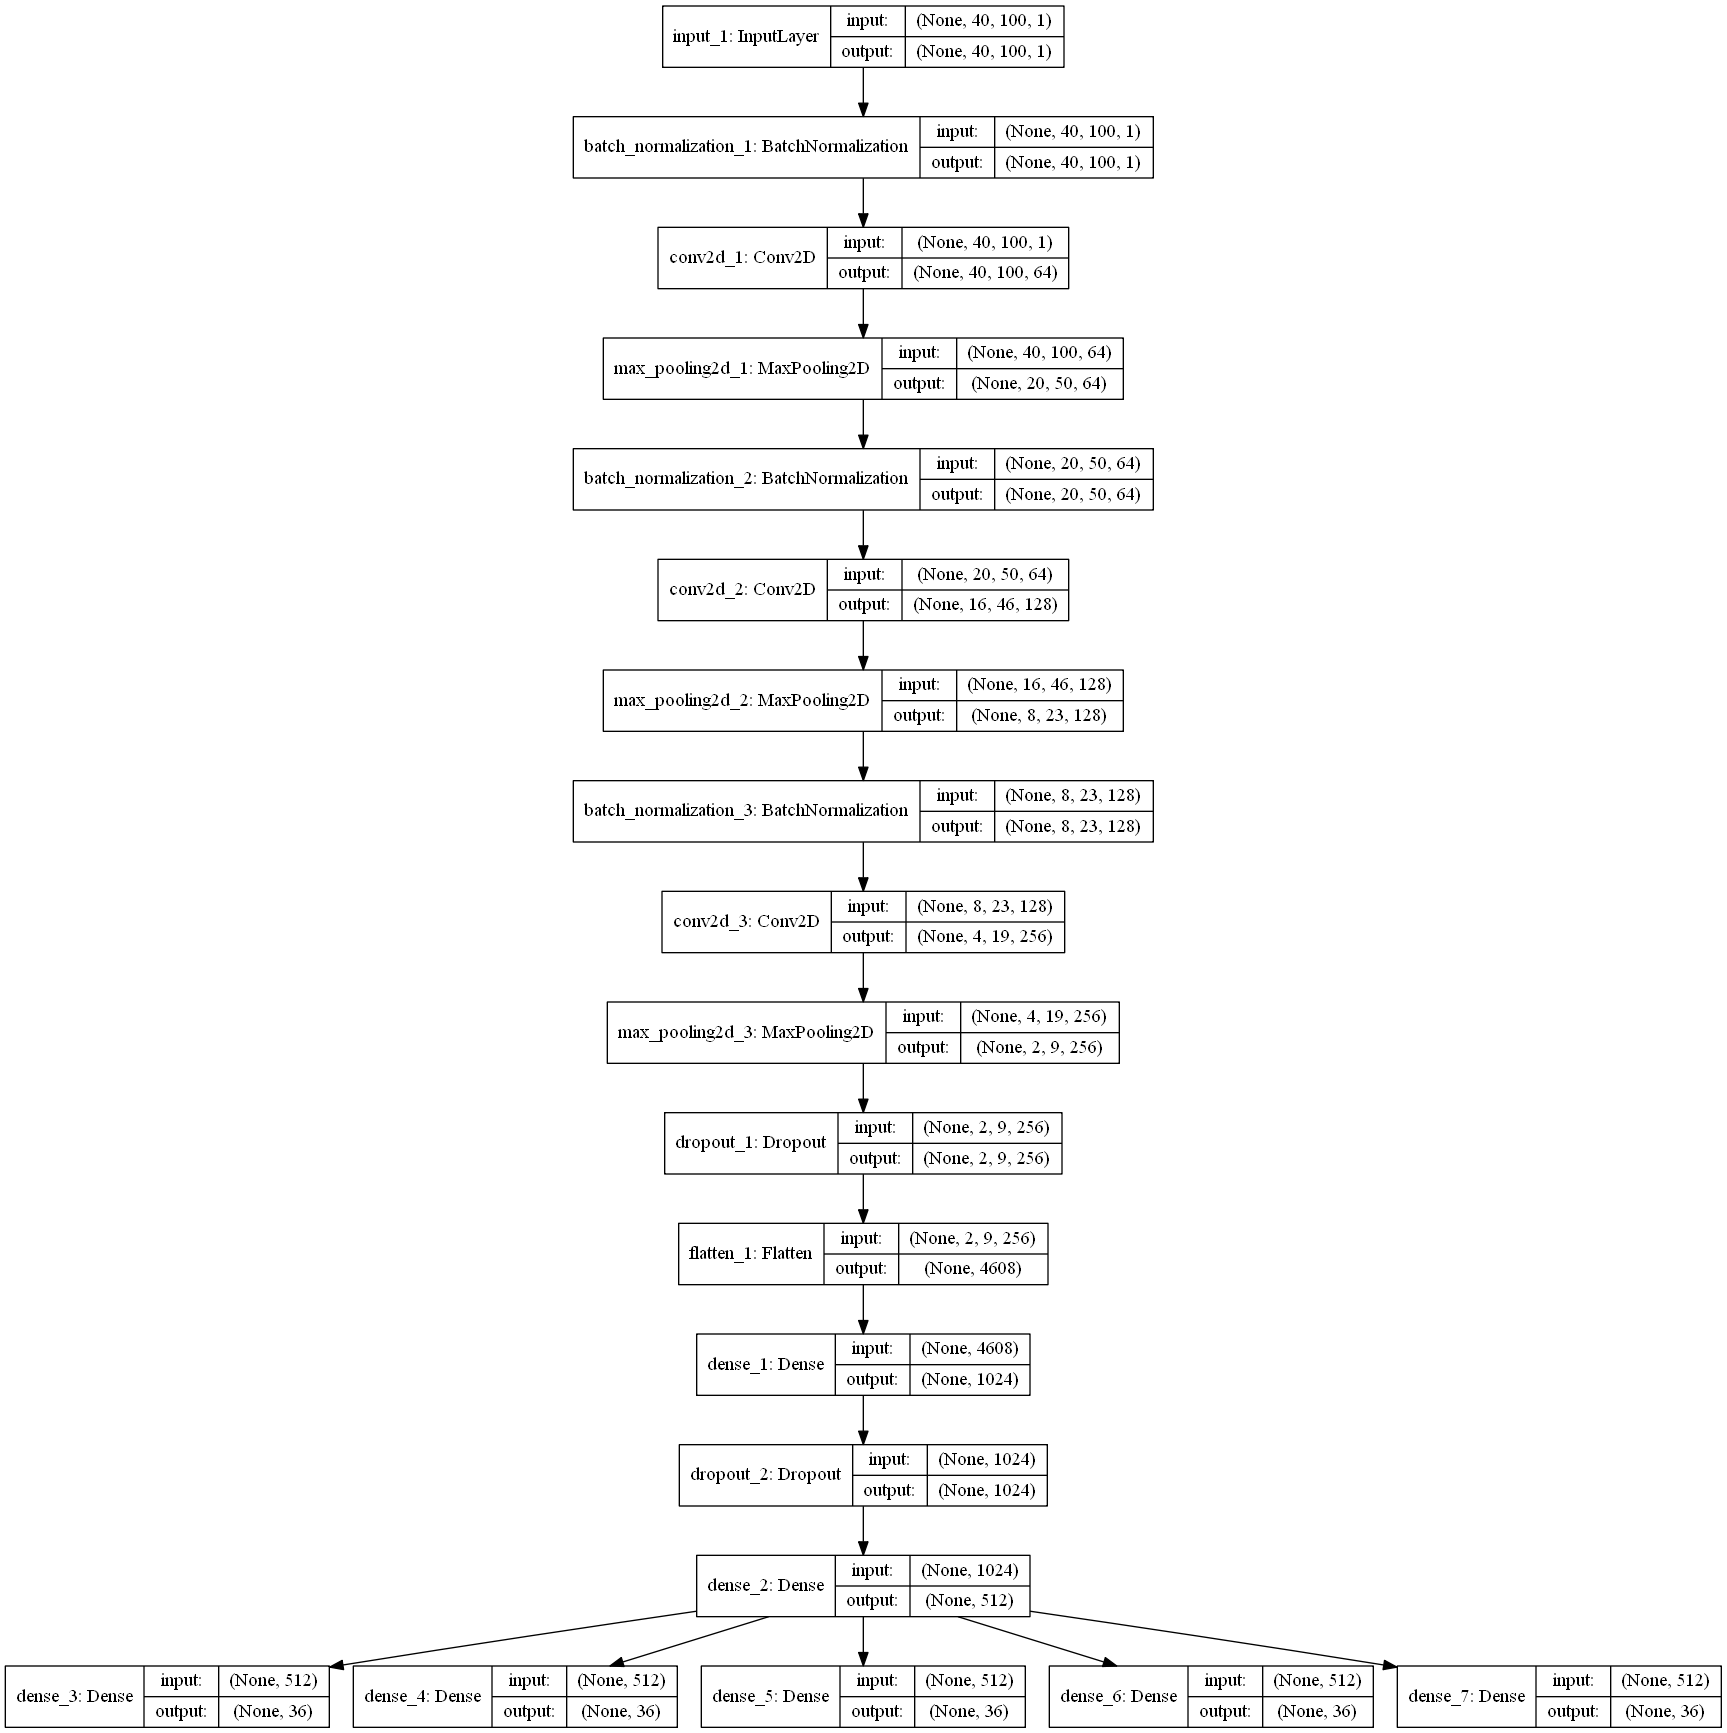

In [34]:
model.summary()
from keras.utils import plot_model
from IPython.display import Image
import graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

plot_model (model, to_file = "./model.png" , show_shapes = True )
Image('model.png')

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [36]:
history=model.fit(X_train, y_train, batch_size=64, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10000/10000 [==============================] - 206s 21ms/step - loss: 18.1394 - dense_3_loss: 3.5549 - dense_4_loss: 3.6607 - dense_5_loss: 3.6336 - dense_6_loss: 3.6389 - dense_7_loss: 3.6513 - dense_3_acc: 0.0597 - dense_4_acc: 0.0523 - dense_5_acc: 0.0478 - dense_6_acc: 0.0478 - dense_7_acc: 0.0501
Epoch 2/20
10000/10000 [==============================] - 203s 20ms/step - loss: 16.3266 - dense_3_loss: 3.1622 - dense_4_loss: 3.2751 - dense_5_loss: 3.2861 - dense_6_loss: 3.2994 - dense_7_loss: 3.3038 - dense_3_acc: 0.0942 - dense_4_acc: 0.0898 - dense_5_acc: 0.0762 - dense_6_acc: 0.0698 - dense_7_acc: 0.0722
Epoch 3/20
10000/10000 [==============================] - 199s 20ms/step - loss: 15.4810 - dense_3_loss: 2.8596 - dense_4_loss: 3.0800 - dense_5_loss: 3.1674 - dense_6_loss: 3.1886 - dense_7_loss: 3.1854 - dense_3_acc: 0.1596 - dense_4_acc: 0.1260 - dense_5_acc: 0.1103 - dense_6_acc: 0.1027 - dense_7_acc: 0.1029
Epoch 4/20

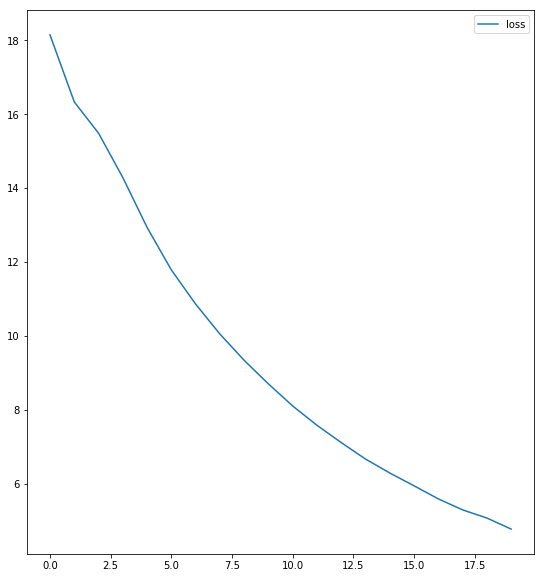

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.plot(history.history["loss"], label="loss")
ax.legend()




In [250]:
history2.history

{'loss': [4.632167599487305,
  4.383013445281982,
  4.250596436309815,
  4.0793851905822756,
  3.9367088920593263,
  3.7677392959594727,
  3.644964692687988,
  3.561365287399292,
  3.50465344619751,
  3.395076573944092,
  3.3276697441101075,
  3.245437020111084,
  3.193257973098755,
  3.1071464988708497,
  3.026048570251465,
  2.9587321620941163,
  2.9276882535934448,
  2.843869817352295,
  2.8380519269943236,
  2.8337110206604006,
  2.731883589172363,
  2.7411025203704833,
  2.6521537101745607,
  2.5845825801849367,
  2.5563794414520262,
  2.5477589714050293,
  2.5198034271240233,
  2.5204946517944338,
  2.4431582569122314,
  2.4119714782714845,
  2.373183584213257,
  2.3645693351745605,
  2.3601023658752442,
  2.3420681854248047,
  2.271431200027466,
  2.2056340782165527,
  2.222709024810791,
  2.2154575538635255,
  2.2142128316879273,
  2.1869331762313844,
  2.1618896545410156,
  2.06669443397522,
  2.1165256622314454,
  2.0640526569366453,
  2.066160244369507,
  2.042909851837158,


In [19]:
history1=model.fit(X_train, y_train, batch_size=64, epochs=20) # train another 20 epochs

Epoch 1/20
10000/10000 [==============================] - 221s 22ms/step - loss: 5.9710 - dense_3_loss: 0.8460 - dense_4_loss: 1.0127 - dense_5_loss: 1.2662 - dense_6_loss: 1.3376 - dense_7_loss: 1.5085 - dense_3_acc: 0.7502 - dense_4_acc: 0.6943 - dense_5_acc: 0.6275 - dense_6_acc: 0.6022 - dense_7_acc: 0.5574
Epoch 2/20
10000/10000 [==============================] - 217s 22ms/step - loss: 5.8649 - dense_3_loss: 0.8682 - dense_4_loss: 0.9709 - dense_5_loss: 1.2158 - dense_6_loss: 1.3120 - dense_7_loss: 1.4981 - dense_3_acc: 0.7518 - dense_4_acc: 0.7074 - dense_5_acc: 0.6408 - dense_6_acc: 0.6156 - dense_7_acc: 0.5631
Epoch 3/20
10000/10000 [==============================] - 232s 23ms/step - loss: 5.7781 - dense_3_loss: 0.8182 - dense_4_loss: 0.9603 - dense_5_loss: 1.1944 - dense_6_loss: 1.3345 - dense_7_loss: 1.4707 - dense_3_acc: 0.7549 - dense_4_acc: 0.7136 - dense_5_acc: 0.6502 - dense_6_acc: 0.6118 - dense_7_acc: 0.5745
Epoch 4/20
10000/10000 [==============================] - 209

In [38]:
history2=model.fit(X_train, y_train, batch_size=64, epochs=200)  # train another 20 epochs

Epoch 1/200
10000/10000 [==============================] - 193s 19ms/step - loss: 4.6322 - dense_3_loss: 0.5647 - dense_4_loss: 0.7312 - dense_5_loss: 1.0098 - dense_6_loss: 1.1334 - dense_7_loss: 1.1931 - dense_3_acc: 0.8155 - dense_4_acc: 0.7467 - dense_5_acc: 0.6717 - dense_6_acc: 0.6276 - dense_7_acc: 0.6155
Epoch 2/200
10000/10000 [==============================] - 194s 19ms/step - loss: 4.3830 - dense_3_loss: 0.5395 - dense_4_loss: 0.7138 - dense_5_loss: 0.9652 - dense_6_loss: 1.0541 - dense_7_loss: 1.1103 - dense_3_acc: 0.8263 - dense_4_acc: 0.7619 - dense_5_acc: 0.6860 - dense_6_acc: 0.6523 - dense_7_acc: 0.6297
Epoch 3/200
10000/10000 [==============================] - 195s 19ms/step - loss: 4.2506 - dense_3_loss: 0.5270 - dense_4_loss: 0.6942 - dense_5_loss: 0.9504 - dense_6_loss: 0.9969 - dense_7_loss: 1.0822 - dense_3_acc: 0.8280 - dense_4_acc: 0.7696 - dense_5_acc: 0.6936 - dense_6_acc: 0.6784 - dense_7_acc: 0.6452
Epoch 4/200
10000/10000 [==============================] -

10000/10000 [==============================] - 193s 19ms/step - loss: 2.5198 - dense_3_loss: 0.3630 - dense_4_loss: 0.4205 - dense_5_loss: 0.5325 - dense_6_loss: 0.5679 - dense_7_loss: 0.6359 - dense_3_acc: 0.8985 - dense_4_acc: 0.8715 - dense_5_acc: 0.8356 - dense_6_acc: 0.8263 - dense_7_acc: 0.8026
Epoch 28/200
10000/10000 [==============================] - 193s 19ms/step - loss: 2.5205 - dense_3_loss: 0.3631 - dense_4_loss: 0.4177 - dense_5_loss: 0.5272 - dense_6_loss: 0.5771 - dense_7_loss: 0.6354 - dense_3_acc: 0.8974 - dense_4_acc: 0.8746 - dense_5_acc: 0.8405 - dense_6_acc: 0.8203 - dense_7_acc: 0.8036
Epoch 29/200
10000/10000 [==============================] - 192s 19ms/step - loss: 2.4432 - dense_3_loss: 0.3672 - dense_4_loss: 0.3979 - dense_5_loss: 0.5157 - dense_6_loss: 0.5387 - dense_7_loss: 0.6236 - dense_3_acc: 0.8946 - dense_4_acc: 0.8776 - dense_5_acc: 0.8449 - dense_6_acc: 0.8302 - dense_7_acc: 0.8049
Epoch 30/200
10000/10000 [==============================] - 191s 19m

10000/10000 [==============================] - 191s 19ms/step - loss: 1.5299 - dense_3_loss: 0.2469 - dense_4_loss: 0.2555 - dense_5_loss: 0.3143 - dense_6_loss: 0.3494 - dense_7_loss: 0.3639 - dense_3_acc: 0.9372 - dense_4_acc: 0.9260 - dense_5_acc: 0.9088 - dense_6_acc: 0.8975 - dense_7_acc: 0.8914
Epoch 80/200
10000/10000 [==============================] - 192s 19ms/step - loss: 1.4647 - dense_3_loss: 0.2360 - dense_4_loss: 0.2453 - dense_5_loss: 0.3062 - dense_6_loss: 0.3191 - dense_7_loss: 0.3582 - dense_3_acc: 0.9368 - dense_4_acc: 0.9303 - dense_5_acc: 0.9126 - dense_6_acc: 0.9088 - dense_7_acc: 0.8952
Epoch 81/200
10000/10000 [==============================] - 191s 19ms/step - loss: 1.4933 - dense_3_loss: 0.2252 - dense_4_loss: 0.2459 - dense_5_loss: 0.3194 - dense_6_loss: 0.3409 - dense_7_loss: 0.3619 - dense_3_acc: 0.9415 - dense_4_acc: 0.9291 - dense_5_acc: 0.9113 - dense_6_acc: 0.9002 - dense_7_acc: 0.8931
Epoch 82/200
10000/10000 [==============================] - 193s 19m

10000/10000 [==============================] - 194s 19ms/step - loss: 1.2473 - dense_3_loss: 0.2167 - dense_4_loss: 0.2322 - dense_5_loss: 0.2456 - dense_6_loss: 0.2744 - dense_7_loss: 0.2785 - dense_3_acc: 0.9444 - dense_4_acc: 0.9365 - dense_5_acc: 0.9306 - dense_6_acc: 0.9242 - dense_7_acc: 0.9179
Epoch 106/200
10000/10000 [==============================] - 193s 19ms/step - loss: 1.2291 - dense_3_loss: 0.2127 - dense_4_loss: 0.2065 - dense_5_loss: 0.2438 - dense_6_loss: 0.2663 - dense_7_loss: 0.2998 - dense_3_acc: 0.9456 - dense_4_acc: 0.9427 - dense_5_acc: 0.9299 - dense_6_acc: 0.9266 - dense_7_acc: 0.9136
Epoch 107/200
10000/10000 [==============================] - 193s 19ms/step - loss: 1.1714 - dense_3_loss: 0.2035 - dense_4_loss: 0.1995 - dense_5_loss: 0.2330 - dense_6_loss: 0.2631 - dense_7_loss: 0.2723 - dense_3_acc: 0.9465 - dense_4_acc: 0.9467 - dense_5_acc: 0.9337 - dense_6_acc: 0.9241 - dense_7_acc: 0.9198
Epoch 108/200
10000/10000 [==============================] - 193s 

10000/10000 [==============================] - 201s 20ms/step - loss: 0.9361 - dense_3_loss: 0.1686 - dense_4_loss: 0.1574 - dense_5_loss: 0.2005 - dense_6_loss: 0.2010 - dense_7_loss: 0.2087 - dense_3_acc: 0.9589 - dense_4_acc: 0.9574 - dense_5_acc: 0.9463 - dense_6_acc: 0.9465 - dense_7_acc: 0.9385
Epoch 156/200
10000/10000 [==============================] - 202s 20ms/step - loss: 0.9439 - dense_3_loss: 0.1614 - dense_4_loss: 0.1739 - dense_5_loss: 0.2008 - dense_6_loss: 0.2029 - dense_7_loss: 0.2050 - dense_3_acc: 0.9608 - dense_4_acc: 0.9558 - dense_5_acc: 0.9453 - dense_6_acc: 0.9459 - dense_7_acc: 0.9435
Epoch 157/200
10000/10000 [==============================] - 194s 19ms/step - loss: 0.9096 - dense_3_loss: 0.1533 - dense_4_loss: 0.1527 - dense_5_loss: 0.1974 - dense_6_loss: 0.2045 - dense_7_loss: 0.2018 - dense_3_acc: 0.9629 - dense_4_acc: 0.9609 - dense_5_acc: 0.9465 - dense_6_acc: 0.9448 - dense_7_acc: 0.9436
Epoch 158/200
10000/10000 [==============================] - 195s 

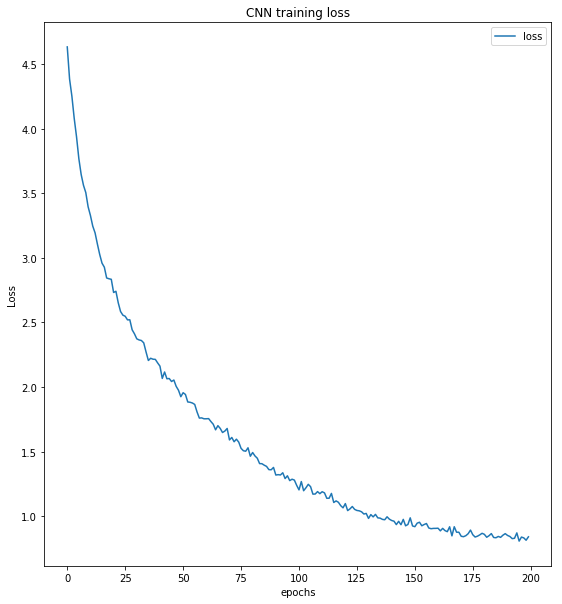

In [234]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.plot(history2.history["loss"], label="loss")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("CNN training loss")
ax.legend()

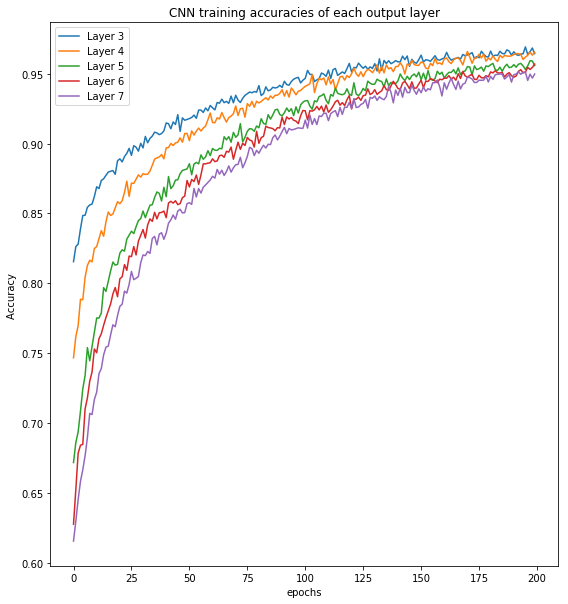

In [254]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.plot(history2.history["dense_3_acc"], label="Layer 3")
ax.plot(history2.history["dense_4_acc"], label="Layer 4")
ax.plot(history2.history["dense_5_acc"], label="Layer 5")
ax.plot(history2.history["dense_6_acc"], label="Layer 6")
ax.plot(history2.history["dense_7_acc"], label="Layer 7")
plt.xlabel('epochs')
plt.ylabel('Accuracy ')
plt.title("CNN training accuracies of each output layer")
ax.legend()

In [299]:
res = model.evaluate(X_test, y_test)

1303/1303 [==============================] - 10s 8ms/step


In [258]:
res[6:]

[0.20798158096699923,
 0.9071373751505649,
 0.8756715271533313,
 0.8534151961139231,
 0.9009976978038515]

In [52]:
model.save("SudoFinalNeural.h5")

## Making predictions

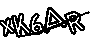

In [317]:
from PIL import Image
Image.fromarray(np.array(X_test[0].reshape(40, 100), dtype=np.uint8))

In [318]:
res = model.predict(np.array([X_test[0]]).reshape(1, 40, 100, 1))

In [319]:
answer = []
for i in range(5):
    answer.append(index2ch[res[i].argmax(1)[0]])
    
str1 =''.join(answer)
# print(index2ch[res[0].argmax(1)[0]], 
#       index2ch[res[1].argmax(1)[0]], 
#       index2ch[res[2].argmax(1)[0]], 
#       index2ch[res[3].argmax(1)[0]], 
#       index2ch[res[4].argmax(1)[0]])

str1

'xk6ar'

In [309]:
count=0

guessed =[]

for i in range(1303):
    answer=[]
    str1=''
    
    res = model.predict(np.array([X_test[i]]).reshape(1, 40, 100, 1))
    for j in range(5):
        answer.append(index2ch[res[j].argmax(1)[0]])
        
    str1 =''.join(answer)
    
    guessed.append(str1)
        
    if str1==labels[10000+i]:
        count=count+1
        
print(count/len(X_test))    

0.13737528779739064


In [315]:
import pandas as pd
df = pd.DataFrame({'actual labels':labels[10000:],
                   'predicted':guessed})

df[ df['actual labels'] == df['predicted']]

,actual labels,predicted
0,xk6ar,xk6ar
1,xk7dy,xk7dy
3,xkcs4,xkcs4
5,xkdgx,xkdgx
7,xkhhv,xkhhv
8,xkhqb,xkhqb
9,xkps8,xkps8
10,xkqvu,xkqvu
11,xkwzd,xkwzd
12,xkxd8,xkxd8


In [316]:
df[ df['actual labels'] != df['predicted']]

,actual labels,predicted
2,xk8sq,x88sq
4,xkcxp,xxcxp
6,xkevq,xxevf
17,xm5n7,xm5vf
18,xm5sm,km3sm
19,xm5wx,xn5wx
20,xm6kv,xm6vv
21,xm6sx,xm65x
22,xmc6x,xnccx
23,xmeha,xmehd
